Gold Price - Random Forest Regressor

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Carga de datos y primeros análisis

In [78]:
# Ya lo tengo descargado 
# para simplemente usarlo:
# df=pd.read_csv('C:/Users/Monica Luna/Desktop/Curso ML/Pandas/gold_price_analytics.csv') # IMN

In [98]:
# Data collection 
# SPX = SP500
# GLD = gold price
# USO = oil price
# EUR/USD change

import yfinance as yf
import pandas as pd

# Data from yfinance library --> Yahoo Finance
tickers = {
    "SPX": "^GSPC",            # S&P 500
    "GLD": "GC=F",             # Gold (Gold Futures)
    "SLV": "SI=F",             # Silver (Silver Futures)
    "EUR/USD": "EURUSD=X",     # EUR/USD
    "USO": "CL=F"              # Oil WTI (Crude Oil Futures)
}

# Download historical data
data = {}
for nombre, ticker in tickers.items():
    df = yf.download(ticker, start="2008-01-01", end="2025-05-23")["Close"]
    data[nombre] = df

# Concat in the same data frame
df = pd.concat(data.values(), axis=1)
df.columns = data.keys()
df = df.dropna() 


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [100]:
df.head()

,SPX,GLD,SLV,EUR/USD,USO
Date,,,,,
2008-01-02,1447.160034,857.000000,15.167,1.471692,99.620003
2008-01-03,1447.160034,866.400024,15.382,1.474491,99.180000
2008-01-04,1411.630005,863.099976,15.346,1.475492,97.910004
2008-01-07,1416.180054,859.599976,15.180,1.468299,95.089996
2008-01-08,1390.189941,878.000000,15.707,1.557099,96.330002


In [102]:
df=df.reset_index()

In [104]:
df.describe()

,Date,SPX,GLD,SLV,EUR/USD,USO
count,4348,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000
mean,2016-09-21 06:57:37.589696512,2611.618357,1508.216398,21.442715,1.214748,72.753664
min,2008-01-02 00:00:00,676.530029,704.900024,8.790000,0.959619,-37.630001
25%,2012-05-21 18:00:00,1388.252533,1222.199951,16.512750,1.101975,53.837501
50%,2016-09-19 12:00:00,2164.929932,1353.850037,19.428500,1.176774,72.524998
75%,2021-01-22 18:00:00,3715.440002,1775.800049,25.370000,1.323846,90.129997
max,2025-05-22 00:00:00,6144.149902,3411.399902,48.584000,1.598798,145.289993
std,NaN,1374.872465,444.594975,6.593606,0.136192,22.228532


In [106]:
df.shape

(4348, 6)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348 entries, 0 to 4347
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4348 non-null   datetime64[ns]
 1   SPX      4348 non-null   float64       
 2   GLD      4348 non-null   float64       
 3   SLV      4348 non-null   float64       
 4   EUR/USD  4348 non-null   float64       
 5   USO      4348 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 203.9 KB


In [110]:
# Date revision --> datetime format
df['Date']=pd.to_datetime(df['Date'])
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4348 entries, 0 to 4347
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
4348 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.1 KB


In [112]:
# Nulls Analysis
df.isnull().sum()

Date       0
SPX        0
GLD        0
SLV        0
EUR/USD    0
USO        0
dtype: int64

In [114]:
# Duplicated
print(df.duplicated().sum())

0


In [124]:
df=df.rename(columns={'EUR/USD':'EUR_USD'})

In [126]:
df.tail()

,Date,SPX,GLD,SLV,EUR_USD,USO
4343,2025-05-16,5958.379883,3182.000000,32.158001,1.119269,62.490002
4344,2025-05-19,5963.600098,3228.899902,32.313000,1.118756,62.689999
4345,2025-05-20,5940.459961,3280.300049,32.980000,1.123343,62.560001
4346,2025-05-21,5844.609863,3309.300049,33.463001,1.128796,61.570000
4347,2025-05-22,5842.009766,3292.300049,33.047001,1.133119,61.200001


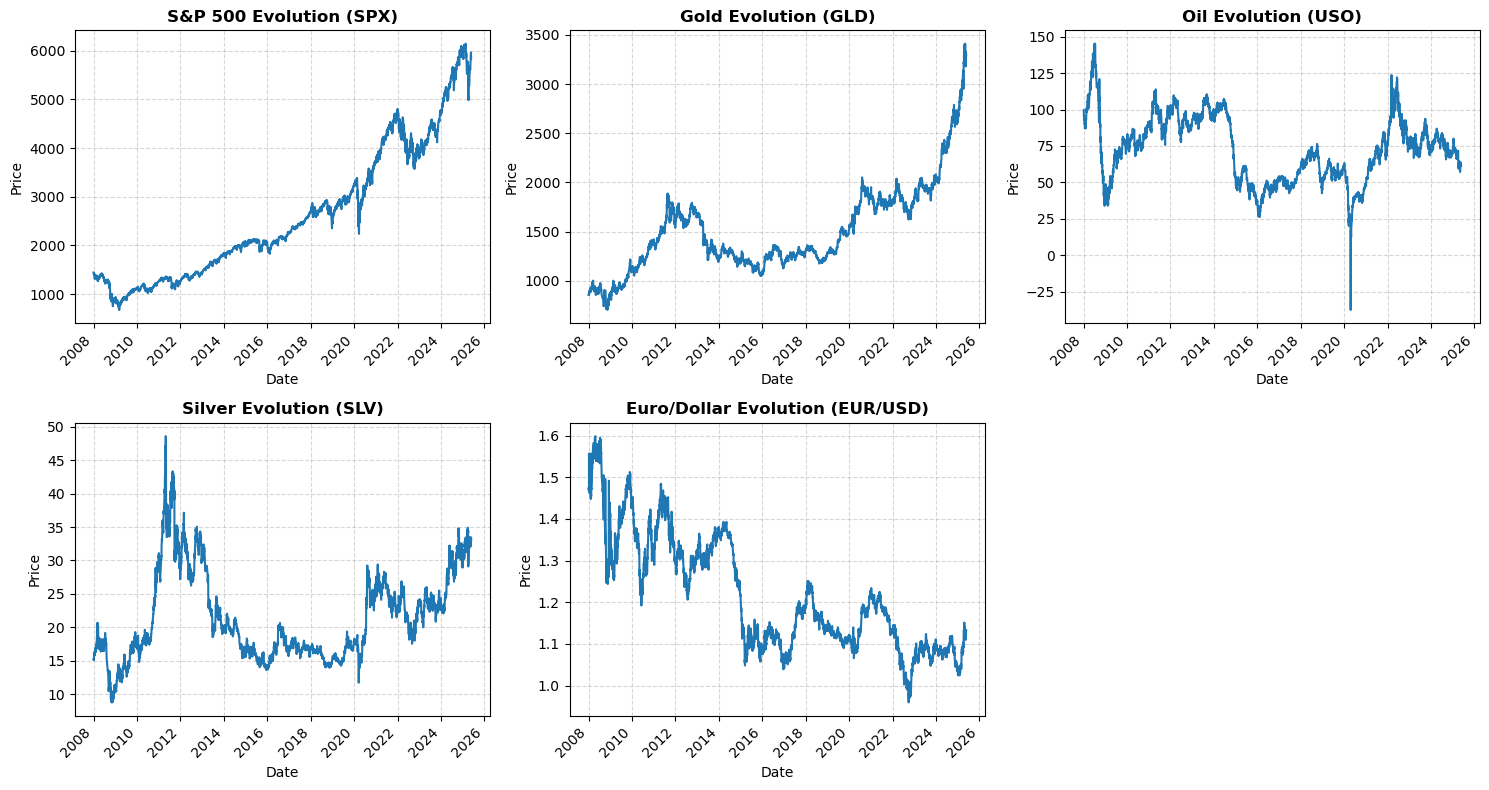

In [128]:
# Preliminar Analysis --> plots

# Configuración de colores para cada serie

# Create figure and axes, only 5 plots (no empty subplot)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# List of variables and titles
variables = [
    ('SPX', 'S&P 500 Evolution (SPX)'),
    ('GLD', 'Gold Evolution (GLD)'),
    ('USO', 'Oil Evolution (USO)'),
    ('SLV', 'Silver Evolution (SLV)'),
    ('EUR_USD', 'Euro/Dollar Evolution (EUR/USD)')
]

# Plot each series with color and descriptive title
for i, (var, title) in enumerate(variables):
    sns.lineplot(x='Date', y=var, data=df, ax=axes[i])
    axes[i].set_title(title, fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    # Improve date format on x-axis
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

# Remove the empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# EDA

<Axes: >

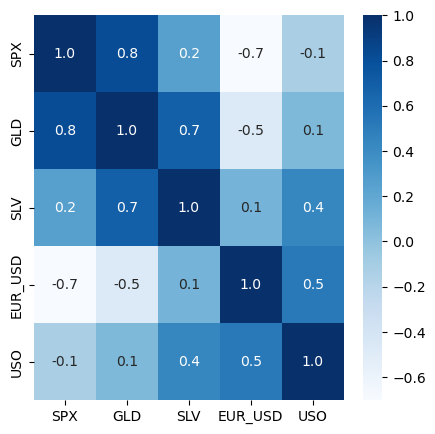

In [130]:
# correlacion
corr=df.corr(numeric_only=True)
plt.figure(figsize=(5,5))
sns.heatmap(corr,cbar=True,fmt='.1f',annot=True,cmap='Blues')

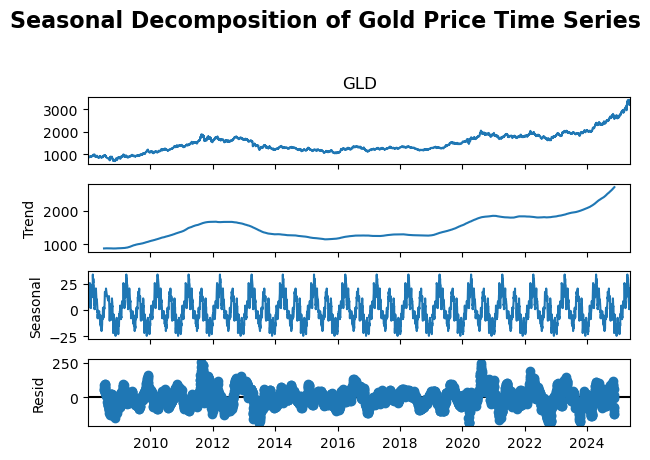

In [134]:
# Seasonal Descompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the 'Date' column as the index for time series analysis
df_ts = df.set_index('Date')

# Perform seasonal decomposition on the Gold price series (GLD)
# Using an additive model and a period of 252 (approx. one trading year)
result = seasonal_decompose(df_ts['GLD'], model='additive', period=252)

# Plot the decomposition results
fig = result.plot()
plt.suptitle('Seasonal Decomposition of Gold Price Time Series', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
plt.show()



In [158]:
# Adding Analysis Indicators

# 20-day Simple Moving Average (SMA)
df['GLD_SMA20'] = df['GLD'].rolling(window=20).mean()

# 14-day Relative Strength Index (RSI)
def compute_rsi(series, window=14):
    delta = series.diff()  # Calculate daily price changes
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()  # Average gains
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()  # Average losses
    RS = gain / loss  # Relative Strength
    RSI = 100 - (100 / (1 + RS))  # RSI formula
    return RSI

df['GLD_RSI14'] = compute_rsi(df['GLD'], 14)

# 20-day Bollinger Bands
rolling_std = df['GLD'].rolling(window=20).std()  # Rolling standard deviation
df['GLD_BB_upper'] = df['GLD_SMA20'] + 2 * rolling_std
df['GLD_BB_lower'] = df['GLD_SMA20'] - 2 * rolling_std


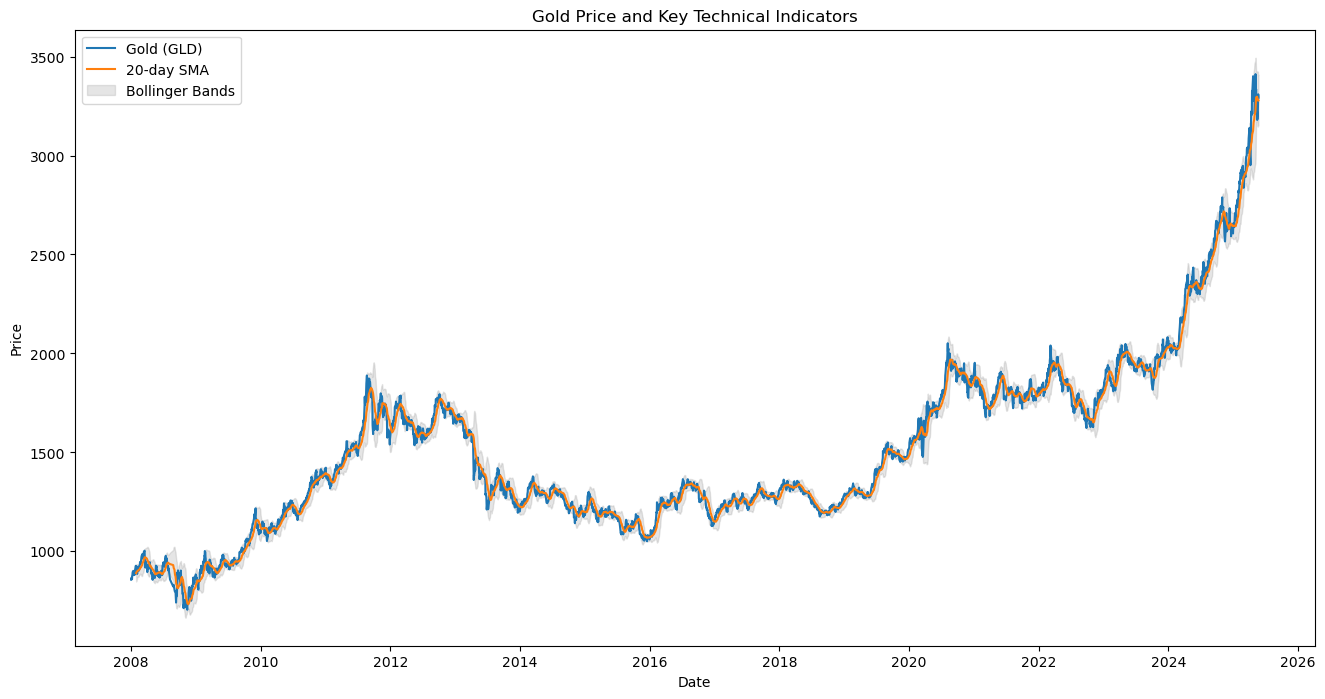

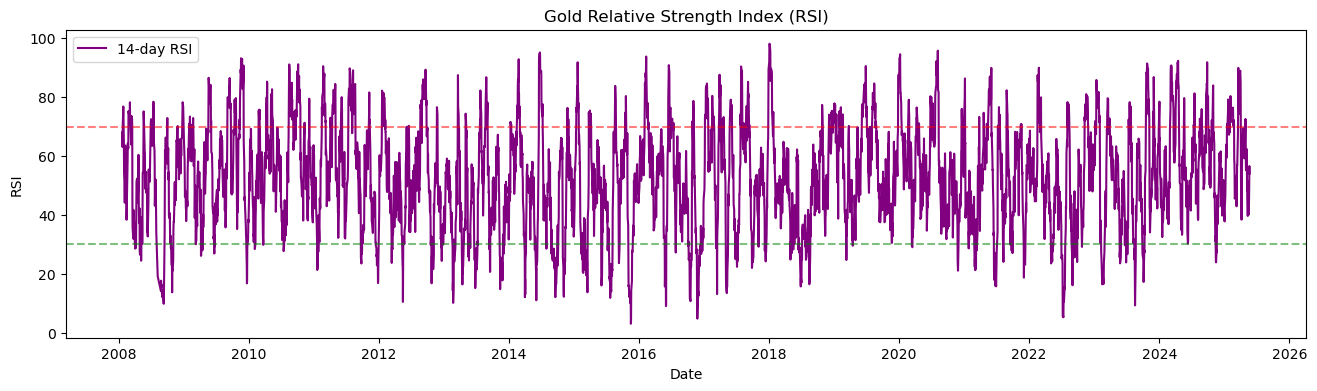

In [162]:

# Plot Gold price with technical indicators
plt.figure(figsize=(16, 8))
plt.plot(df['Date'], df['GLD'], label='Gold (GLD)')
plt.plot(df['Date'], df['GLD_SMA20'], label='20-day SMA')
plt.fill_between(df['Date'], df['GLD_BB_upper'], df['GLD_BB_lower'],
                 color='gray', alpha=0.2, label='Bollinger Bands')
plt.title('Gold Price and Key Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI indicator
plt.figure(figsize=(16, 4))
plt.plot(df['Date'], df['GLD_RSI14'], label='14-day RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('Gold Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()



# Feature Engineering

In [180]:
# Lag and pct_change

# Create 1, 5, and 20-day lags for the gold price
for lag in [1, 5, 20]:
    df[f'gld_lag_{lag}'] = df['GLD'].shift(lag)

# Daily and weekly percentage changes
df['gld_pct_change_1d'] = df['GLD'].pct_change(1)
df['gld_pct_change_5d'] = df['GLD'].pct_change(5)

In [182]:
# 20-day rolling volatility (standard deviation)
df['gld_volatility_20d'] = df['GLD'].rolling(window=20).std()

# 20-day price range
df['gld_range_20d'] = df['GLD'].rolling(window=20).max() - df['GLD'].rolling(window=20).min()

In [190]:
# Temporal Variables
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.dayofweek
df['year'] = df['Date'].dt.year

In [194]:
# Delete NaN values as a consequence of rolling and shift
df=df.dropna().reset_index()

In [198]:
df.head()

,index,Date,SPX,GLD,SLV,EUR_USD,USO,GLD_SMA20,GLD_RSI14,GLD_BB_upper,...,gld_lag_1,gld_lag_5,gld_lag_20,gld_pct_change_1d,gld_pct_change_5d,gld_volatility_20d,gld_range_20d,month,day_of_week,year
0,20,2008-01-31,1378.550049,922.700012,16.948000,1.486503,91.750000,893.074991,65.136733,934.572628,...,920.599976,905.500000,857.000000,0.002281,0.018995,20.748819,67.500000,1,3,2008
1,21,2008-02-01,1395.420044,908.700012,16.823999,1.479991,88.959999,895.189990,55.625019,935.250153,...,922.700012,910.500000,866.400024,-0.015173,-0.001977,20.030081,67.500000,2,4,2008
2,22,2008-02-04,1380.819946,904.900024,16.740000,1.482800,90.019997,897.279993,51.495943,934.555729,...,908.700012,927.099976,863.099976,-0.004182,-0.023946,18.637868,67.500000,2,0,2008
3,23,2008-02-05,1336.640015,885.900024,16.302999,1.463807,88.410004,898.594995,44.133651,931.920085,...,904.900024,925.099976,859.599976,-0.020997,-0.042374,16.662545,49.099976,2,1,2008
4,24,2008-02-06,1326.449951,900.700012,16.507999,1.461710,87.139999,899.729996,58.164115,931.616903,...,885.900024,920.599976,878.000000,0.016706,-0.021616,15.943454,47.599976,2,2,2008


# Advanced Model

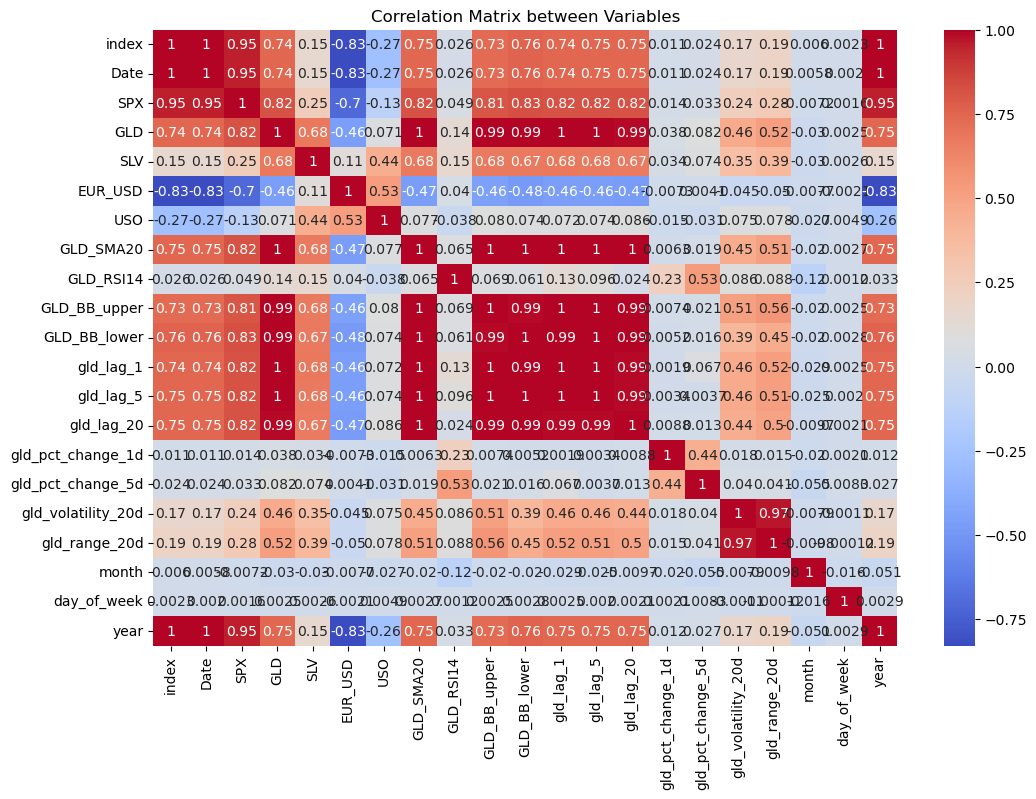

Variables removed due to high collinearity: ['Date', 'GLD_SMA20', 'GLD_BB_upper', 'GLD_BB_lower', 'gld_lag_1', 'gld_lag_5', 'gld_lag_20', 'year']


In [386]:
### Análisis de correlación: para descartar variables redundantes.

# Compute correlation matrix
corr = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Variables')
plt.show()

#Remove variables with correlation > 0.99
threshold = 0.99
corr_matrix = df.corr().abs() # evoid signus problems
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df_reduced = df.drop(columns=to_drop)
print(f"Variables removed due to high collinearity: {to_drop}")



In [388]:
df_reduced.head()

,index,SPX,GLD,SLV,EUR_USD,USO,GLD_RSI14,gld_pct_change_1d,gld_pct_change_5d,gld_volatility_20d,gld_range_20d,month,day_of_week
0,20,1378.550049,922.700012,16.948000,1.486503,91.750000,65.136733,0.002281,0.018995,20.748819,67.500000,1,3
1,21,1395.420044,908.700012,16.823999,1.479991,88.959999,55.625019,-0.015173,-0.001977,20.030081,67.500000,2,4
2,22,1380.819946,904.900024,16.740000,1.482800,90.019997,51.495943,-0.004182,-0.023946,18.637868,67.500000,2,0
3,23,1336.640015,885.900024,16.302999,1.463807,88.410004,44.133651,-0.020997,-0.042374,16.662545,49.099976,2,1
4,24,1326.449951,900.700012,16.507999,1.461710,87.139999,58.164115,0.016706,-0.021616,15.943454,47.599976,2,2


In [354]:
df_reduced.describe()

,index,SPX,GLD,SLV,EUR_USD,USO,GLD_RSI14,gld_pct_change_1d,gld_pct_change_5d,gld_volatility_20d,gld_range_20d,month,day_of_week
count,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000,4328.000000
mean,2183.500000,2617.315418,1511.074191,21.467832,1.213536,72.660159,52.526731,0.000357,0.001767,26.010346,87.959886,6.483133,2.024030
std,1249.530312,1375.480385,443.621996,6.598362,0.135324,22.235988,17.517401,0.011137,0.024571,15.651486,49.852480,3.429260,1.398892
min,20.000000,676.530029,704.900024,8.790000,0.959619,-37.630001,3.032829,-0.093538,-0.134478,4.095109,13.500000,1.000000,0.000000
25%,1101.750000,1390.824982,1223.699951,16.540001,1.101895,53.787500,40.479068,-0.004870,-0.011753,15.579392,54.800049,4.000000,1.000000
50%,2183.500000,2170.850098,1357.399963,19.471500,1.175910,72.369999,52.369788,0.000451,0.002461,21.399280,73.799927,6.000000,2.000000
75%,3265.250000,3726.905090,1776.450012,25.407249,1.322537,89.847498,64.963949,0.006097,0.015994,31.898182,108.325043,9.000000,3.000000
max,4347.000000,6144.149902,3411.399902,48.584000,1.598798,145.289993,98.141263,0.090277,0.204236,132.972543,460.099854,12.000000,4.000000


In [390]:
# Model data
X=df_reduced.drop(columns=['index','GLD','month','day_of_week'])
y=df_reduced['GLD']

# Division no random --> train y test
split = int(len(df_reduced)*0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

In [392]:
print(X.shape,X_train.shape,y.shape,y_train.shape)

(4328, 9) (3462, 9) (4328,) (3462,)


In [394]:
# Training models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()

# Train models
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_lr = lr.predict(X_test)

# Evaluation function
def print_metrics(y_true, y_pred, name):
    print(f"\nModel: {name}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R2: {r2_score(y_true, y_pred):.4f}")

print_metrics(y_test, y_pred_rf, 'Random Forest')
print_metrics(y_test, y_pred_gb, 'Gradient Boosting')
print_metrics(y_test, y_pred_lr, 'Linear Regression')



Model: Random Forest
MAE: 366.24
RMSE: 516.14
R2: -0.5541

Model: Gradient Boosting
MAE: 387.89
RMSE: 511.64
R2: -0.5271

Model: Linear Regression
MAE: 179.85
RMSE: 241.62
R2: 0.6594


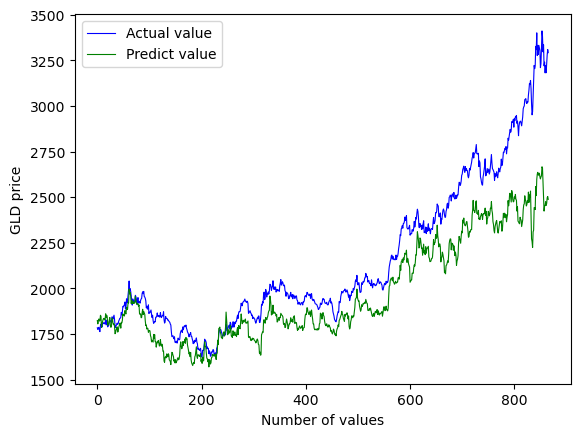

In [398]:
# plot real vs pred
y_test=list(y_test)

plt.plot(y_test,color='blue', label='Actual value',linewidth=0.8)
plt.plot(y_pred_lr,color='green',label='Predict value',linewidth=0.8)
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()


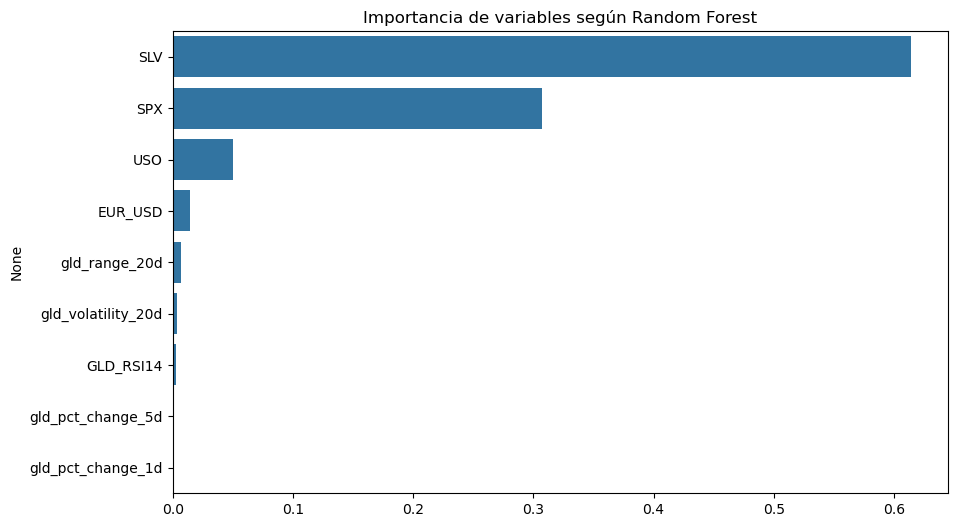

In [288]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Importancia de variables según Random Forest')
plt.show()


C:\Users\Monica Luna\AppData\Local\Temp\ipykernel_18716\3427681442.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


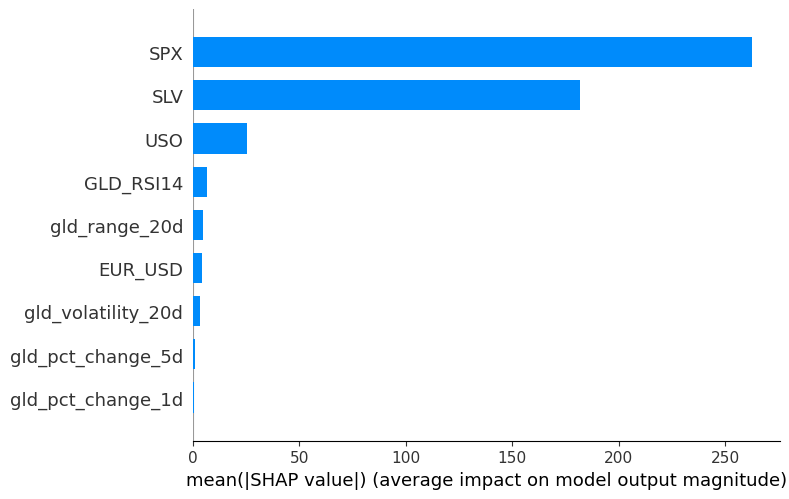

C:\Users\Monica Luna\AppData\Local\Temp\ipykernel_18716\3427681442.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


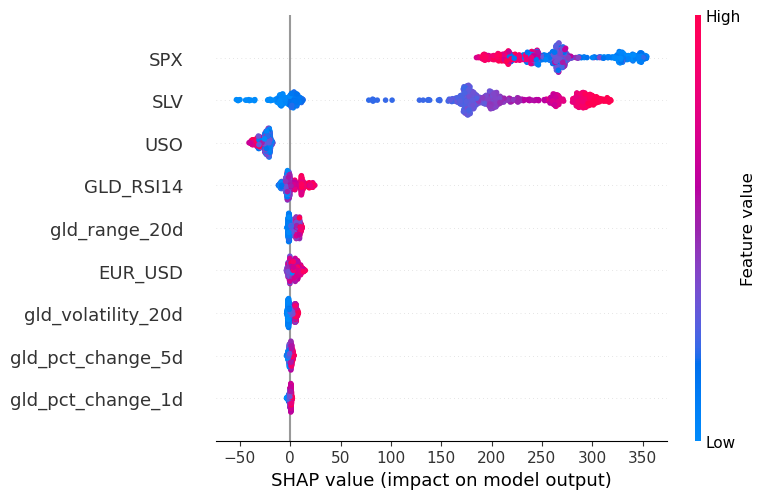

In [294]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Gráfico resumen de importancia
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [292]:
!pip install shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
    --------------------------------------- 10.2/545.2 kB ? eta -:--:--
   ----- ---------------------------------- 71.7/545.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  542.7/545.2 kB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 545.2/545.2 kB 5.8 MB/s eta 0:00:00


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [318]:
df_reduced.head()

,index,SPX,GLD,SLV,EUR_USD,USO,GLD_RSI14,gld_pct_change_1d,gld_pct_change_5d,gld_volatility_20d,gld_range_20d,month,day_of_week
0,20,1378.550049,922.700012,16.948000,1.486503,91.750000,65.136733,0.002281,0.018995,20.748819,67.500000,1,3
1,21,1395.420044,908.700012,16.823999,1.479991,88.959999,55.625019,-0.015173,-0.001977,20.030081,67.500000,2,4
2,22,1380.819946,904.900024,16.740000,1.482800,90.019997,51.495943,-0.004182,-0.023946,18.637868,67.500000,2,0
3,23,1336.640015,885.900024,16.302999,1.463807,88.410004,44.133651,-0.020997,-0.042374,16.662545,49.099976,2,1
4,24,1326.449951,900.700012,16.507999,1.461710,87.139999,58.164115,0.016706,-0.021616,15.943454,47.599976,2,2


In [334]:
# Dividimos los datos

X=df_reduced.drop(columns=['index','GLD','GLD_RSI14','gld_pct_change_1d','gld_pct_change_5d','gld_volatility_20d','gld_range_20d','month','day_of_week'])
y=df_reduced['GLD']

In [336]:
X

,SPX,SLV,EUR_USD,USO
0,1378.550049,16.948000,1.486503,91.750000
1,1395.420044,16.823999,1.479991,88.959999
2,1380.819946,16.740000,1.482800,90.019997
3,1336.640015,16.302999,1.463807,88.410004
4,1326.449951,16.507999,1.461710,87.139999
...,...,...,...,...
4323,5958.379883,32.158001,1.119269,62.490002
4324,5963.600098,32.313000,1.118756,62.689999
4325,5940.459961,32.980000,1.123343,62.560001
4326,5844.609863,33.463001,1.128796,61.570000


In [338]:
# Train test split
split = int(len(df_reduced)*0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

In [340]:
# entrenamos modelo Random Forest
model=RandomForestRegressor(n_estimators=100)

In [342]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [344]:
# evaluamos el modelo
X_test_pred=model.predict(X_test)

In [346]:
# R square evaluacion
r2_score=metrics.r2_score(y_test,X_test_pred)
print(r2_score)


-0.5241814726032519


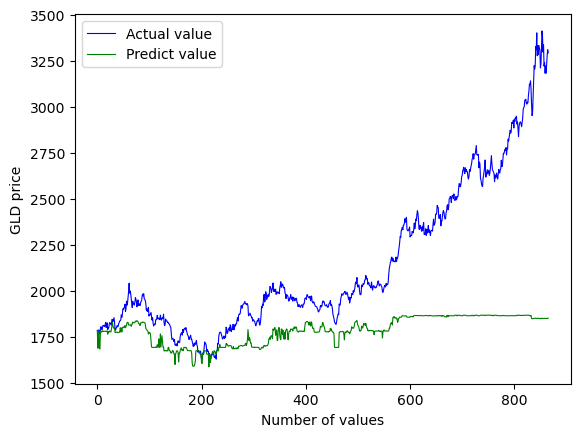

In [348]:
# plot real vs pred
y_test=list(y_test)

plt.plot(y_test,color='blue', label='Actual value',linewidth=0.8)
plt.plot(X_test_pred,color='green',label='Predict value',linewidth=0.8)
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
